In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt


(50000, 32, 32, 3)


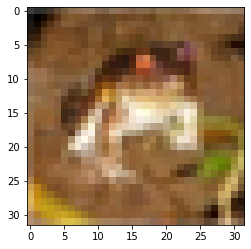

In [21]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

print(x_train.shape)
plt.imshow(x_train[0])
LABELS=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [22]:
#builds model with Keras api
def buildModel():
    inputs=layers.Input(shape=(32,32,3))
    #will output 32 images if filter is specified for 32
    #11*11 kernel Size
    normal=layers.Normalization()(inputs)
    #parameters are (11*11*3+1)*6 as there are 3 channels coming in from the data
    cov0=layers.Conv2D(4,2,padding="same",activation=tf.nn.relu)(normal)

    pool_layer=layers.AveragePooling2D(pool_size=(2,2))(cov0)#(I-F)/S+1
    cov1=layers.Conv2D(8,2,activation=tf.nn.relu,padding="same")(pool_layer)
    #pool_layer1=layers.AveragePooling2D(pool_size=(2,2))(cov1)
    cov2=layers.Conv2D(12,5,padding='same',activation='relu')(cov1)
   # pool_layer2=layers.AveragePooling2D(pool_size=(2,2))(cov2)
    cov3=layers.Conv2D(12,7,padding='same',activation='relu')(cov2)
    pool_layer3=layers.AveragePooling2D(pool_size=(2,2))(cov3)
    cov4=layers.Conv2D(24,5,padding='same',activation='relu')(pool_layer3)
    cov5=layers.Conv2D(32,5,padding='same',activation='relu')(cov4)
    pool_layer4=layers.AveragePooling2D(pool_size=(2,2))(cov5)
    cov6=layers.Conv2D(64,7,padding='same',activation='relu')(pool_layer4)
    cov7=layers.Conv2D(80,5,padding='same',activation='relu')(cov6)
    pool_layer5=layers.AveragePooling2D(pool_size=(2,2))(cov7)
    cov8=layers.Conv2D(160,5,padding='same',activation='relu')(pool_layer5)
    flat=layers.Flatten()(cov8)
    h0=layers.Dense(64,activation='relu')(flat)
    h1=layers.Dense(64,activation='relu')(h0)

    outputs=layers.Dense(10,activation=tf.nn.softmax)(flat)

    model=keras.Model(inputs=inputs,outputs=outputs)
    #sparse categorical cross entropy performs one hot encoding
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model




model=buildModel()
#number of paramteters for model (filter_height*filter_width*#input_channels+1)*number of filters
print(model.summary())


    
    

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization_4 (Normaliza  (None, 32, 32, 3)         7         
 tion)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 4)         52        
                                                                 
 average_pooling2d_15 (Aver  (None, 16, 16, 4)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 8)         136       
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 12)        2412

In [23]:
EPOCHS=15
BATCH_SIZE=300
model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE)

Epoch 1/15
167/167 [==============================] - 14s 82ms/step - loss: 1.8838 - accuracy: 0.2995
Epoch 2/15
167/167 [==============================] - 13s 79ms/step - loss: 1.4730 - accuracy: 0.4687
Epoch 3/15
167/167 [==============================] - 13s 78ms/step - loss: 1.3149 - accuracy: 0.5303
Epoch 4/15
167/167 [==============================] - 13s 76ms/step - loss: 1.1963 - accuracy: 0.5741
Epoch 5/15
167/167 [==============================] - 13s 76ms/step - loss: 1.1015 - accuracy: 0.6128
Epoch 6/15
167/167 [==============================] - 13s 76ms/step - loss: 1.0245 - accuracy: 0.6366
Epoch 7/15
167/167 [==============================] - 13s 76ms/step - loss: 0.9517 - accuracy: 0.6649
Epoch 8/15
167/167 [==============================] - 13s 77ms/step - loss: 0.8933 - accuracy: 0.6855
Epoch 9/15
167/167 [==============================] - 13s 77ms/step - loss: 0.8216 - accuracy: 0.7118
Epoch 10/15
167/167 [==============================] - 13s 77ms/step - loss: 0.764

In [24]:
model.evaluate(x_test,y_test,batch_size=BATCH_SIZE)


34/34 [==============================] - 1s 26ms/step - loss: 1.3895 - accuracy: 0.6163


[1.3895165920257568, 0.6162999868392944]

1/1 [==============================] - 0s 49ms/step
frog


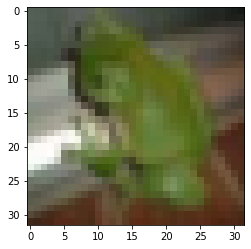

In [25]:
index=7
test_val=tf.expand_dims(x_test[index],0)
guess=tf.argmax(tf.squeeze(model.predict(test_val)))

print(LABELS[guess])
plt.imshow(x_test[index])

5
